Integrantes:

- Victoria Alvarez
- Franco Berrios
- Felipe Manoli
- Cristobal Muñoz

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [21]:
datosapple = pd.read_csv('C:/Users/felip/Desktop/Analisis de datos/applemobilitytrends-2021-12-09.csv')
datosgoogle = pd.read_csv('C:/Users/felip/Desktop/Analisis de datos/Global_Mobility_Report.csv')
## Se importan los datos de cada una de las fuentes.

C:\Users\felip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\felip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [22]:
datosapple

geo_type        region transportation_type alternative_name  \
0     country/region       Albania             driving              NaN   
1     country/region       Albania             walking              NaN   
2     country/region     Argentina             driving              NaN   
3     country/region     Argentina             walking              NaN   
4     country/region     Australia             driving               AU   
...              ...           ...                 ...              ...   
4686          county   York County             walking              NaN   
4687          county  Young County             driving              NaN   
4688          county   Yuba County             driving              NaN   
4689          county   Yuma County             driving              NaN   
4690          county   Yuma County             walking              NaN   

        sub-region        country  2020-01-13  2020-01-14  2020-01-15  \
0              NaN            NaN       100.0       95.30      101.43   
1              NaN            NaN       100.0      100.68       98.93   
2              NaN            NaN       100.0       97.07      102.45   
3              NaN            NaN       100.0       95.11      101.37   
4              NaN            NaN       100.0      102.98      104.21   
...            ...            ...         ...         ...         ...   
4686  Pennsylvania  United States       100.0      110.22      121.82   
4687         Texas  United States       100.0       98.85       97.76   
4688    California  United States       100.0      102.98      103.10   
4689       Arizona  United States       100.0      101.82      106.67   
4690       Arizona  United States       100.0       95.88       98.97   

      2020-01-16  ...  2021-11-30  2021-12-01  2021-12-02  2021-12-03  \
0          97.20  ...      152.35      151.20      141.39      163.52   
1          98.46  ...      181.32      224.26      210.36      215.39   
2         111.21  ...       93.26      100.08      104.56      135.03   
3         112.67  ...       94.21       99.95      103.63      125.52   
4         108.63  ...      128.27      130.51      135.67      143.79   
...          ...  ...         ...         ...         ...         ...   
4686      109.72  ...      200.06      200.28      204.75      242.15   
4687       92.21  ...      160.43      133.94      163.62      270.80   
4688      114.08  ...      160.95      170.27      164.70      201.53   
4689      108.93  ...      146.23      149.87      149.14      179.34   
4690       92.88  ...      169.10      173.91      173.30      210.82   

      2021-12-04  2021-12-05  2021-12-06  2021-12-07  2021-12-08  2021-12-09  
0         172.67      162.12      156.23      150.23      171.58      159.52  
1         214.93      156.72      191.94      208.66      244.65      203.88  
2         146.15       91.97       97.89      128.10       98.74      115.38  
3         123.87       71.43      102.94      122.42       84.15      114.29  
4         113.66      121.15      124.25      128.52      138.88      146.07  
...          ...         ...         ...         ...         ...         ...  
4686      245.19      157.62      197.62      186.69      191.71      197.18  
4687      177.71      133.40      164.36      166.46      176.96      179.00  
4688      190.09      132.93      155.47      168.96      169.29      168.30  
4689      158.87      125.10      151.27      156.07      157.59      160.94  
4690      210.04      133.82      192.62      167.38      182.58      206.09  

[4691 rows x 703 columns]

In [23]:
datosapplechile=datosapple[datosapple['region']=='Chile']
datosapplechile
## Filtramos los datos en base a Chile obteniendo los resultados de gente que maneja o camina.

geo_type region transportation_type alternative_name sub-region  \
22  country/region  Chile             driving              NaN        NaN   
23  country/region  Chile             walking              NaN        NaN   

   country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2021-11-30  \
22     NaN       100.0       99.01      102.57      106.47  ...      109.32   
23     NaN       100.0      102.58      103.13      103.74  ...      116.08   

    2021-12-01  2021-12-02  2021-12-03  2021-12-04  2021-12-05  2021-12-06  \
22      114.46      115.37      158.26      153.99      106.04      118.25   
23      123.24      122.84      151.82      132.18       79.77      129.48   

    2021-12-07  2021-12-08  2021-12-09  
22      137.21      112.95      137.00  
23      144.41       95.62      144.52  

[2 rows x 703 columns]

In [24]:
datosapplechile.drop(['geo_type', 'region', 'alternative_name', 'country', 'sub-region'],axis = 1, inplace = True)
datosapplechile
## Eliminamos las columnas innecesarias para la respuesta.

C:\Users\felip\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


transportation_type  2020-01-13  2020-01-14  2020-01-15  2020-01-16  \
22             driving       100.0       99.01      102.57      106.47   
23             walking       100.0      102.58      103.13      103.74   

    2020-01-17  2020-01-18  2020-01-19  2020-01-20  2020-01-21  ...  \
22      124.69      120.83       97.12      102.53      101.57  ...   
23      107.87       86.73       59.44       99.53       98.22  ...   

    2021-11-30  2021-12-01  2021-12-02  2021-12-03  2021-12-04  2021-12-05  \
22      109.32      114.46      115.37      158.26      153.99      106.04   
23      116.08      123.24      122.84      151.82      132.18       79.77   

    2021-12-06  2021-12-07  2021-12-08  2021-12-09  
22      118.25      137.21      112.95      137.00  
23      129.48      144.41       95.62      144.52  

[2 rows x 698 columns]

In [25]:
tabla = datosapplechile.melt(id_vars=['transportation_type'], var_name="fecha", value_name="cantidad") 
tabla
## Creamos la columna fecha y cantidad.

transportation_type       fecha  cantidad
0                driving  2020-01-13    100.00
1                walking  2020-01-13    100.00
2                driving  2020-01-14     99.01
3                walking  2020-01-14    102.58
4                driving  2020-01-15    102.57
...                  ...         ...       ...
1389             walking  2021-12-07    144.41
1390             driving  2021-12-08    112.95
1391             walking  2021-12-08     95.62
1392             driving  2021-12-09    137.00
1393             walking  2021-12-09    144.52

[1394 rows x 3 columns]

In [26]:
camina=tabla[tabla['transportation_type']=='walking']
maneja=tabla[tabla['transportation_type']=='driving']
## Se crean las tablas 'camina' y 'maneja'.

In [12]:
camina

transportation_type       fecha  cantidad
1                walking  2020-01-13    100.00
3                walking  2020-01-14    102.58
5                walking  2020-01-15    103.13
7                walking  2020-01-16    103.74
9                walking  2020-01-17    107.87
...                  ...         ...       ...
1385             walking  2021-12-05     79.77
1387             walking  2021-12-06    129.48
1389             walking  2021-12-07    144.41
1391             walking  2021-12-08     95.62
1393             walking  2021-12-09    144.52

[697 rows x 3 columns]

In [13]:
maneja

transportation_type       fecha  cantidad
0                driving  2020-01-13    100.00
2                driving  2020-01-14     99.01
4                driving  2020-01-15    102.57
6                driving  2020-01-16    106.47
8                driving  2020-01-17    124.69
...                  ...         ...       ...
1384             driving  2021-12-05    106.04
1386             driving  2021-12-06    118.25
1388             driving  2021-12-07    137.21
1390             driving  2021-12-08    112.95
1392             driving  2021-12-09    137.00

[697 rows x 3 columns]

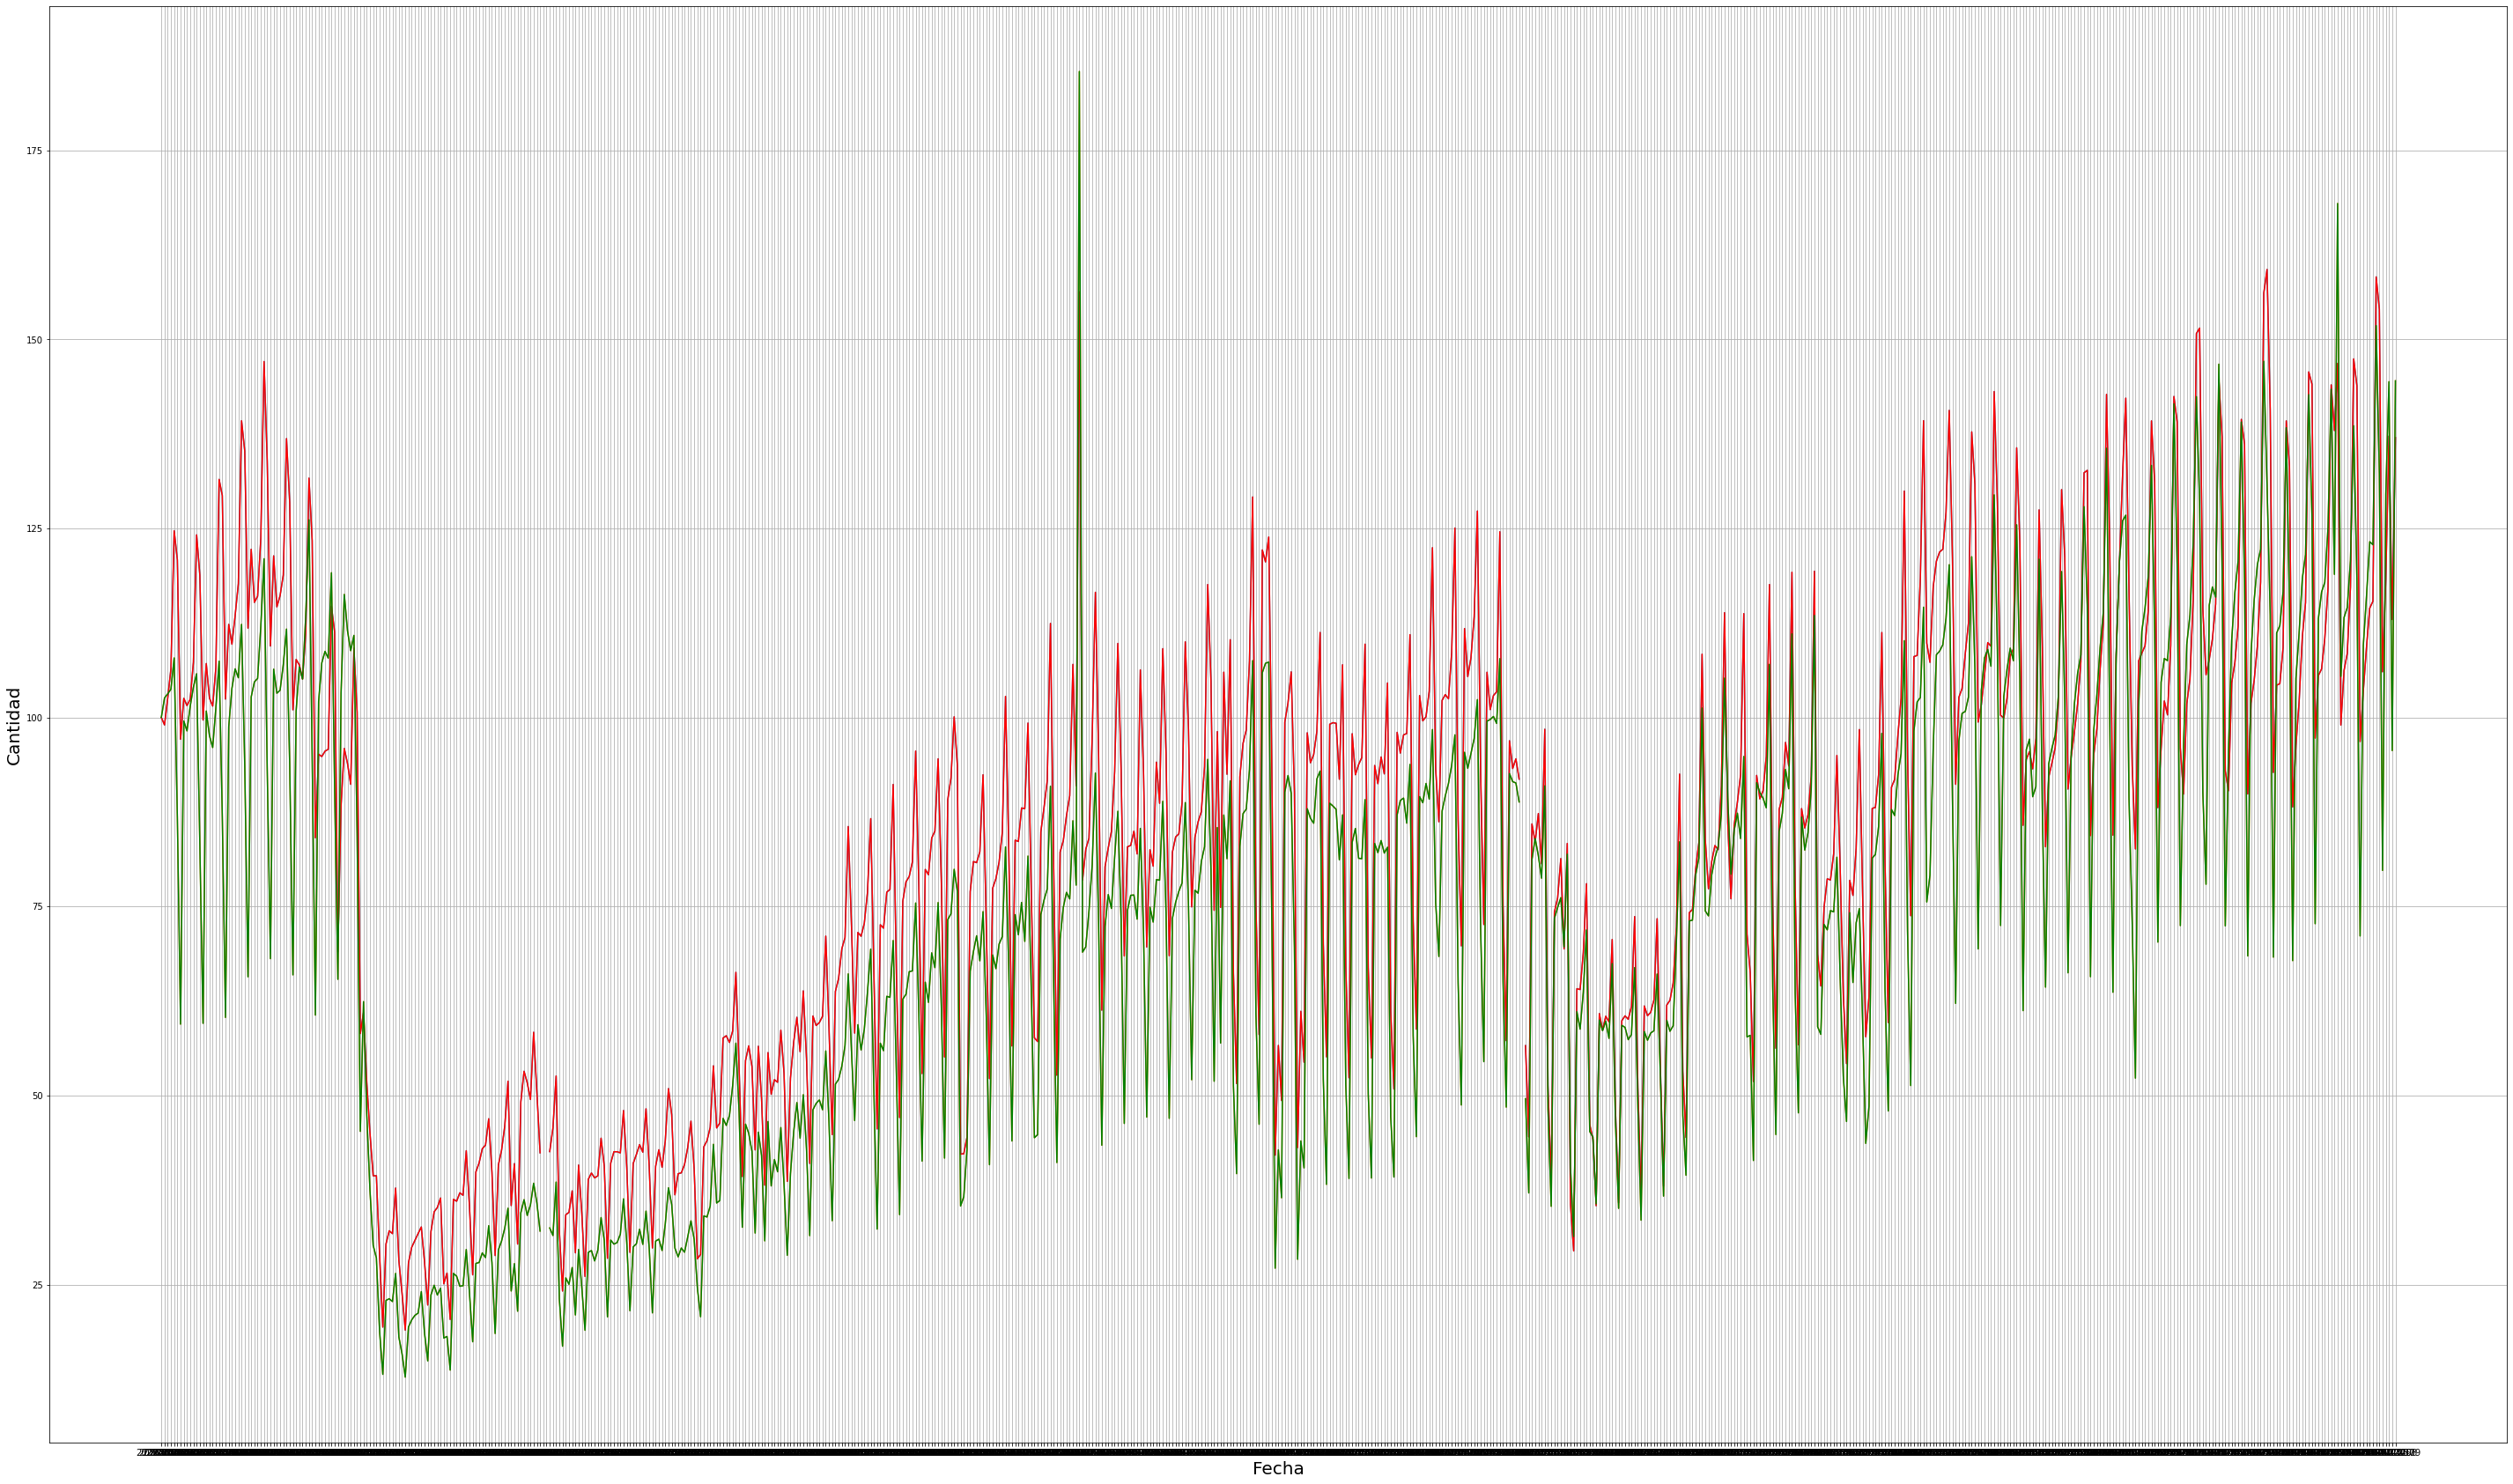

In [14]:
x=camina["fecha"]
y_1 = maneja["cantidad"]
y_2 = camina["cantidad"]
plt.figure(figsize=(50,30))
plt.plot(x,y_1, label='Maneja')
plt.plot(x,y_2, label = 'Camina')
plt.plot(x,y_1,'r',x,y_2,'g')

plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Cantidad",fontsize=20)
plt.grid()
plt.show()
## Se genera el gráfico.

De color rojo podemos ver a las personas que manejan y de color verde a las que caminan, y podemos conlcuir de este gráfico que las personas que manejan superan a las que caminan.

In [15]:
datosgoogle

country_region_code        country_region       sub_region_1  \
0                        AE  United Arab Emirates                NaN   
1                        AE  United Arab Emirates                NaN   
2                        AE  United Arab Emirates                NaN   
3                        AE  United Arab Emirates                NaN   
4                        AE  United Arab Emirates                NaN   
...                     ...                   ...                ...   
7941896                  ZW              Zimbabwe  Midlands Province   
7941897                  ZW              Zimbabwe  Midlands Province   
7941898                  ZW              Zimbabwe  Midlands Province   
7941899                  ZW              Zimbabwe  Midlands Province   
7941900                  ZW              Zimbabwe  Midlands Province   

        sub_region_2 metro_area iso_3166_2_code  census_fips_code  \
0                NaN        NaN             NaN               NaN   
1                NaN        NaN             NaN               NaN   
2                NaN        NaN             NaN               NaN   
3                NaN        NaN             NaN               NaN   
4                NaN        NaN             NaN               NaN   
...              ...        ...             ...               ...   
7941896       Kwekwe        NaN             NaN               NaN   
7941897       Kwekwe        NaN             NaN               NaN   
7941898       Kwekwe        NaN             NaN               NaN   
7941899       Kwekwe        NaN             NaN               NaN   
7941900       Kwekwe        NaN             NaN               NaN   

                            place_id        date  \
0        ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-15   
1        ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-16   
2        ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-17   
3        ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-18   
4        ChIJvRKrsd9IXj4RpwoIwFYv0zM  2020-02-19   
...                              ...         ...   
7941896  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2021-12-01   
7941897  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2021-12-02   
7941898  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2021-12-03   
7941899  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2021-12-06   
7941900  ChIJRcIZ3-FJNBkRRsj55IcLpfU  2021-12-07   

         retail_and_recreation_percent_change_from_baseline  \
0                                                      0.0    
1                                                      1.0    
2                                                     -1.0    
3                                                     -2.0    
4                                                     -2.0    
...                                                    ...    
7941896                                                NaN    
7941897                                                NaN    
7941898                                                NaN    
7941899                                                NaN    
7941900                                                NaN    

         grocery_and_pharmacy_percent_change_from_baseline  \
0                                                      4.0   
1                                                      4.0   
2                                                      1.0   
3                                                      1.0   
4                                                      0.0   
...                                                    ...   
7941896                                                NaN   
7941897                                                NaN   
7941898                                                NaN   
7941899                                                NaN   
7941900                                                NaN   

         parks_percent_change_from_baseline  \
0                                       5.0   
1                                       4.0   
2                                       5.0   

In [16]:
datoschile= datosgoogle[datosgoogle['country_region_code']=='CL']
datoschile
## Se filtran los datos para Chile.

country_region_code country_region sub_region_1         sub_region_2  \
2203786                  CL          Chile          NaN                  NaN   
2203787                  CL          Chile          NaN                  NaN   
2203788                  CL          Chile          NaN                  NaN   
2203789                  CL          Chile          NaN                  NaN   
2203790                  CL          Chile          NaN                  NaN   
...                     ...            ...          ...                  ...   
2250415                  CL          Chile   Valparaíso  Valparaíso Province   
2250416                  CL          Chile   Valparaíso  Valparaíso Province   
2250417                  CL          Chile   Valparaíso  Valparaíso Province   
2250418                  CL          Chile   Valparaíso  Valparaíso Province   
2250419                  CL          Chile   Valparaíso  Valparaíso Province   

        metro_area iso_3166_2_code  census_fips_code  \
2203786        NaN             NaN               NaN   
2203787        NaN             NaN               NaN   
2203788        NaN             NaN               NaN   
2203789        NaN             NaN               NaN   
2203790        NaN             NaN               NaN   
...            ...             ...               ...   
2250415        NaN             NaN               NaN   
2250416        NaN             NaN               NaN   
2250417        NaN             NaN               NaN   
2250418        NaN             NaN               NaN   
2250419        NaN             NaN               NaN   

                            place_id        date  \
2203786  ChIJL68lBEHFYpYRHbkCERPhBQU  2020-02-15   
2203787  ChIJL68lBEHFYpYRHbkCERPhBQU  2020-02-16   
2203788  ChIJL68lBEHFYpYRHbkCERPhBQU  2020-02-17   
2203789  ChIJL68lBEHFYpYRHbkCERPhBQU  2020-02-18   
2203790  ChIJL68lBEHFYpYRHbkCERPhBQU  2020-02-19   
...                              ...         ...   
2250415  ChIJ_8SDfJJuYpYRt810yECat60  2021-12-03   
2250416  ChIJ_8SDfJJuYpYRt810yECat60  2021-12-04   
2250417  ChIJ_8SDfJJuYpYRt810yECat60  2021-12-05   
2250418  ChIJ_8SDfJJuYpYRt810yECat60  2021-12-06   
2250419  ChIJ_8SDfJJuYpYRt810yECat60  2021-12-07   

         retail_and_recreation_percent_change_from_baseline  \
2203786                                                2.0    
2203787                                                3.0    
2203788                                                1.0    
2203789                                                0.0    
2203790                                                0.0    
...                                                    ...    
2250415                                               -3.0    
2250416                                               -2.0    
2250417                                               -7.0    
2250418                                               -4.0    
2250419                                                3.0    

         grocery_and_pharmacy_percent_change_from_baseline  \
2203786                                                4.0   
2203787                                                5.0   
2203788                                                6.0   
2203789                                                5.0   
2203790                                                8.0   
...                                                    ...   
2250415                                               13.0   
2250416                                               11.0   
2250417                                                9.0   
2250418                                               10.0   
2250419                                               21.0   

         parks_percent_change_from_baseline  \
2203786                                 9.0   
2203787                                 5.0   
2203788                                11.0   
2203789                                13.0   
2203790     

In [17]:
datosparques=datoschile[['date','parks_percent_change_from_baseline',]]
datoschile.sort_values(by='date')
datosparques
## Se eliminan las columnas que no se necesitan y se ordena por fecha.

date  parks_percent_change_from_baseline
2203786  2020-02-15                                 9.0
2203787  2020-02-16                                 5.0
2203788  2020-02-17                                11.0
2203789  2020-02-18                                13.0
2203790  2020-02-19                                11.0
...             ...                                 ...
2250415  2021-12-03                               -16.0
2250416  2021-12-04                               -25.0
2250417  2021-12-05                               -29.0
2250418  2021-12-06                               -27.0
2250419  2021-12-07                               -19.0

[46634 rows x 2 columns]

In [18]:
datosparques = datosparques.rename(columns = {"parks_percent_change_from_baseline" : "Porcentaje_Parques","date":"Fecha"})
datosparques = datosparques.dropna()
datosparques
## Se cambian los nombres de las columnas y se eliminan los datos nulos.

Fecha  Porcentaje_Parques
2203786  2020-02-15                 9.0
2203787  2020-02-16                 5.0
2203788  2020-02-17                11.0
2203789  2020-02-18                13.0
2203790  2020-02-19                11.0
...             ...                 ...
2250415  2021-12-03               -16.0
2250416  2021-12-04               -25.0
2250417  2021-12-05               -29.0
2250418  2021-12-06               -27.0
2250419  2021-12-07               -19.0

[46461 rows x 2 columns]

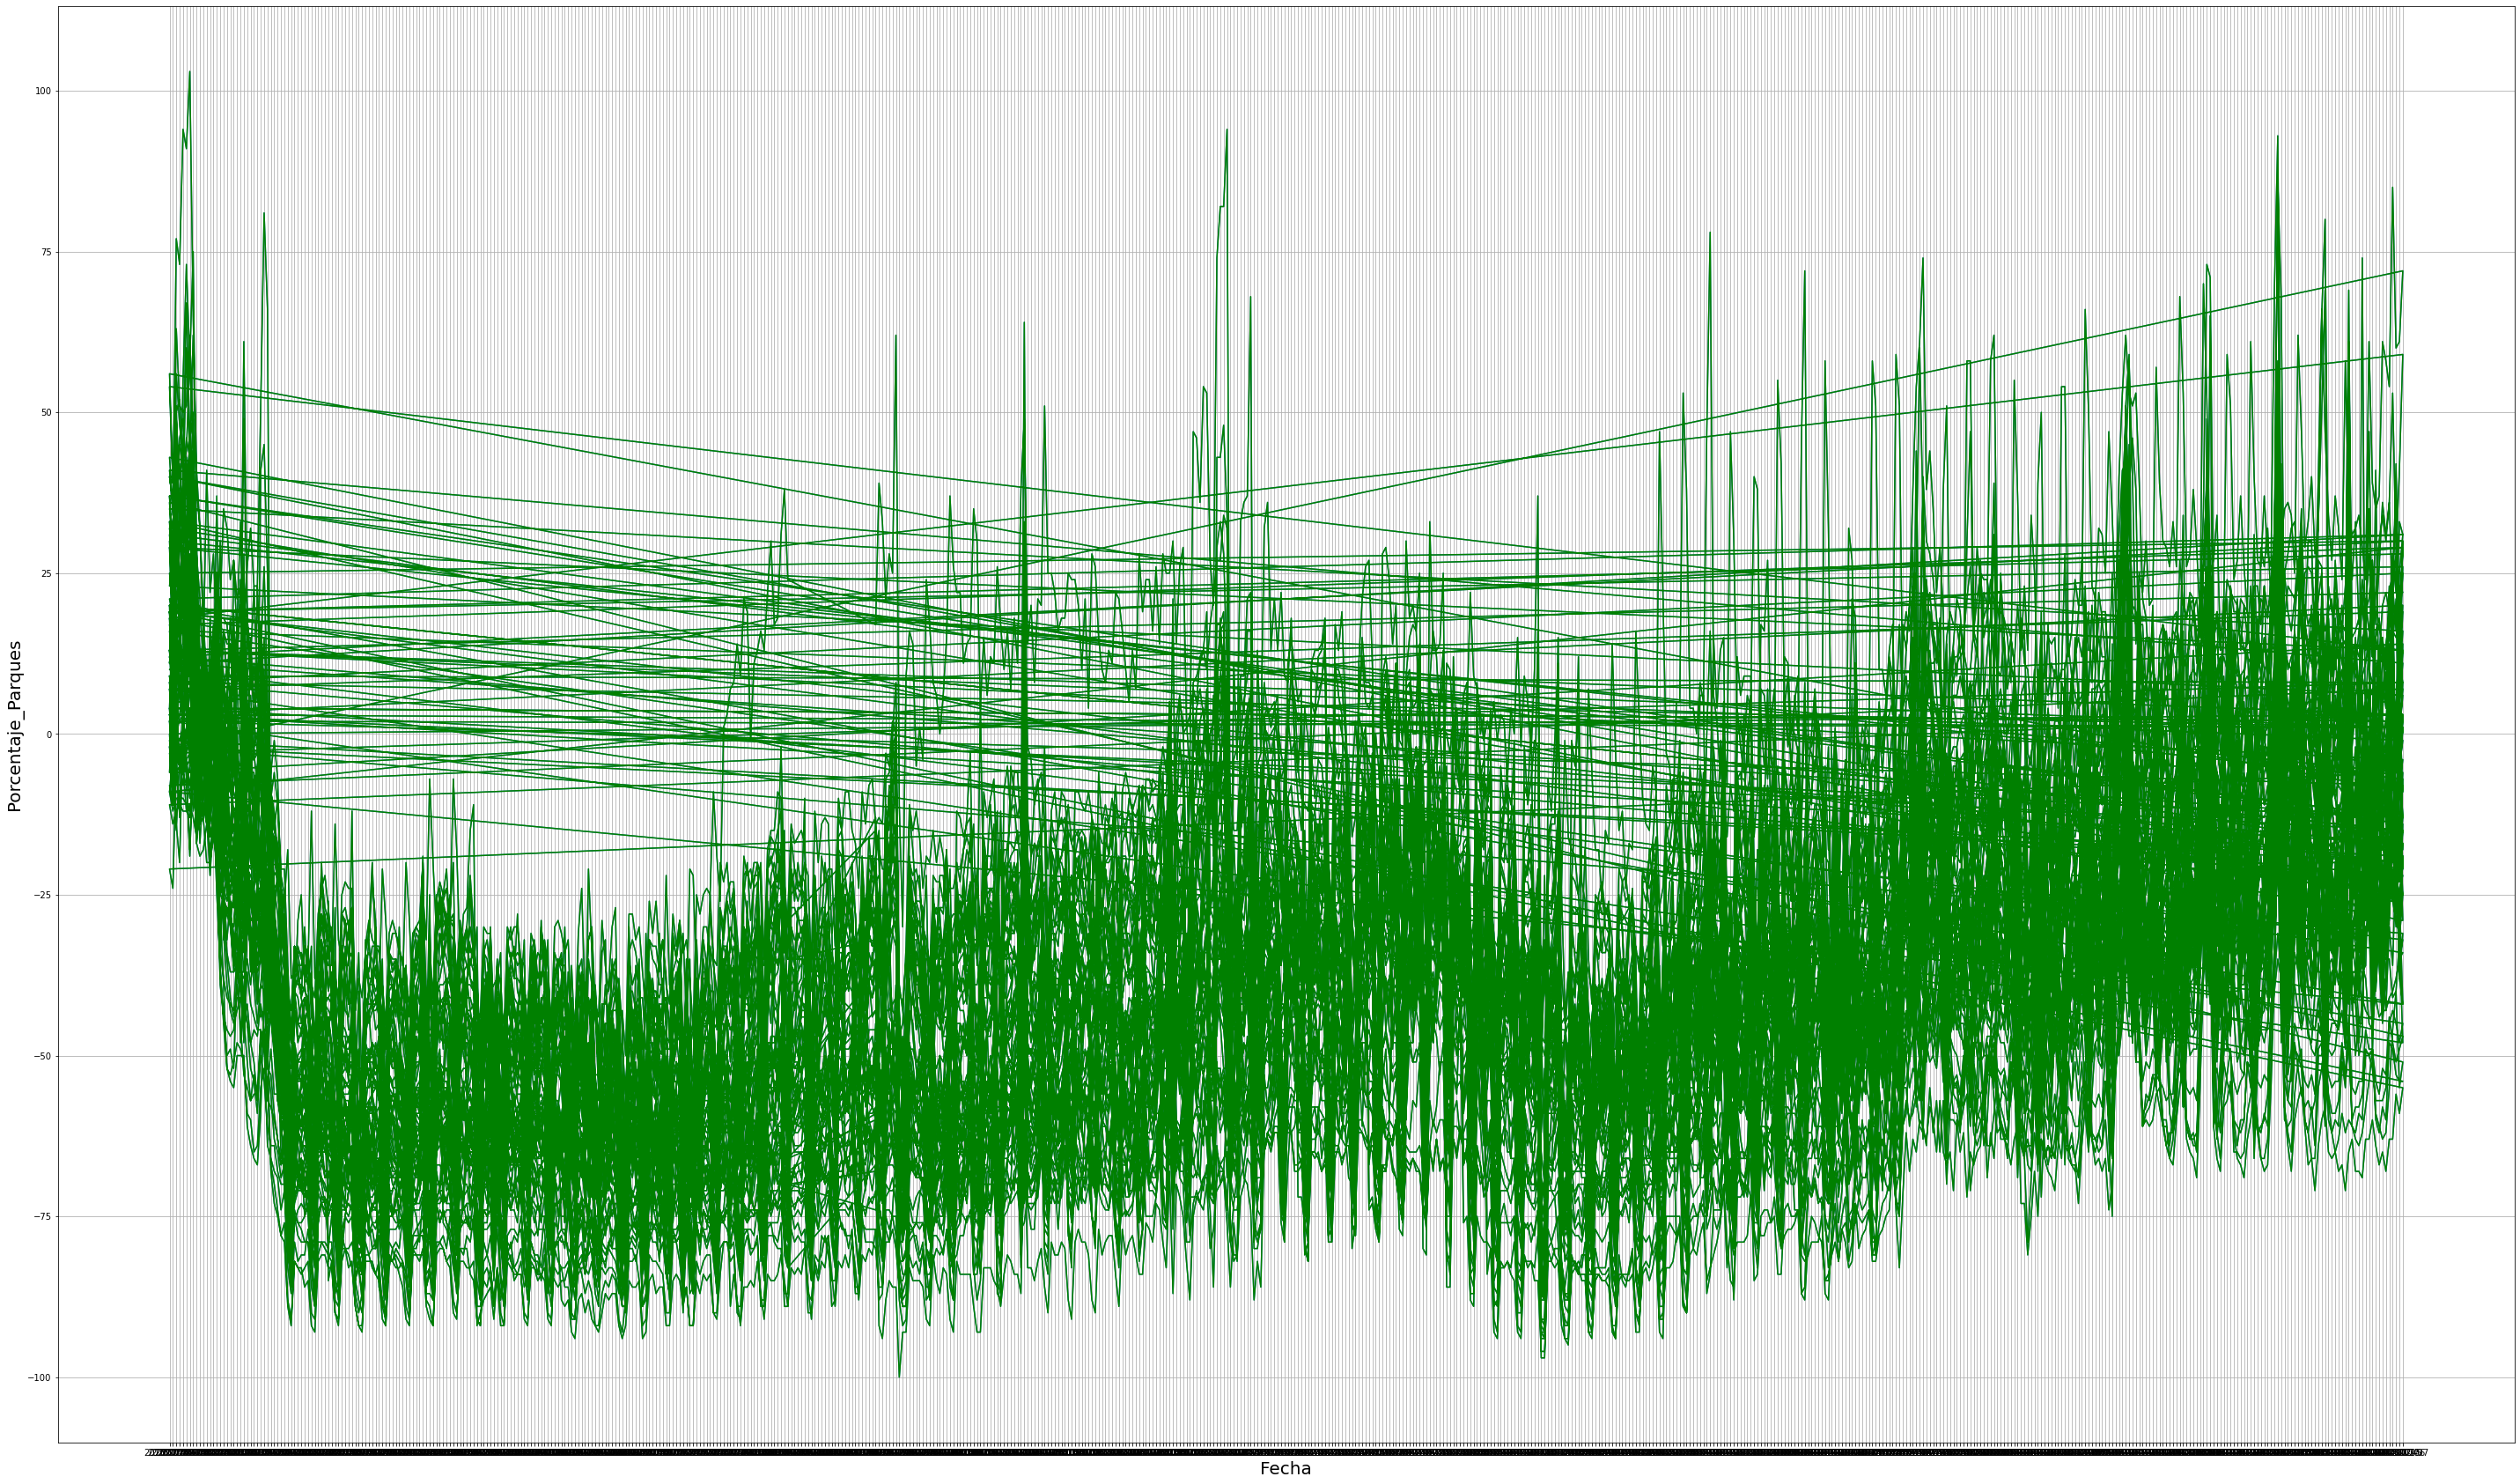

In [19]:
x=datosparques["Fecha"]
y = datosparques["Porcentaje_Parques"]
plt.figure(figsize=(50,30))
plt.plot(x,y, label='Porcentaje_Parques')
plt.plot(x,y,'g')

plt.xlabel("Fecha",fontsize=20)
plt.ylabel("Porcentaje_Parques",fontsize=20)
plt.grid()
plt.show()
## Se genera el gráfico.

En el inicio se ve que hay una baja considerable en la visita a los parques y luego se ve una tendencia a la alta en la visita de los parques.